In [8]:
from IPython.display import display, Image, Audio
import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests

In [19]:
video = cv2.VideoCapture("data/messi.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

1131 frames read.


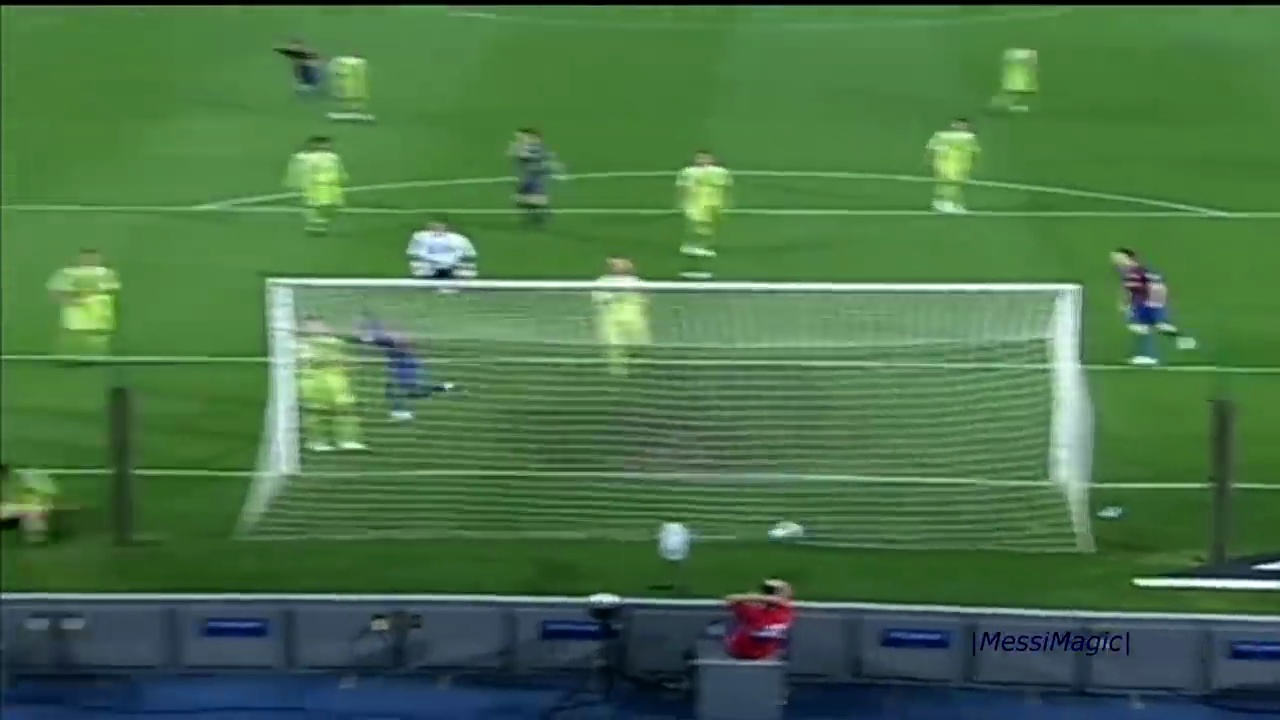

In [20]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

"Witness the breathtaking dynamics of nature with this incredible footage showcasing a pack of wolves in the midst of a strategic hunt across the snowy landscape. The tension is palpable as the wolves coordinate their efforts to challenge a mighty bison, showcasing the raw survival instincts and the harsh beauty of the natural world. This dramatic encounter highlights the resilience and the intricate social behaviors of wolves, as well as the strength and determination of the bison amidst the winter's unforgiving backdrop. Experience the thrill of the chase and the stark realities of life in the wild through this captivating video."


In [28]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of a super excited brazilian sports narrator who is narrating his favorite match. He is a big fan of Messi, the player who scores in this clip. Use caps and exclamation marks where needed to communicate excitement. Only include the narration, your output must be in english. When the ball goes into the net, you must scream GOL either once or multiple times.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::10]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "api_key": 'YOUR KEY',
    "headers": {"Openai-Version": "2020-11-07"},
    "max_tokens": 500,
}

result = openai.ChatCompletion.create(**params)
print(result.choices[0].message.content)

AND THERE HE GOES, MESSI WITH THE BALL, LIKE A MAGICIAN ON THE FIELD, DODGING ONE, TWO, THREE... UNSTOPPABLE! LOOK AT HIM GO, THE CROWD IS ROARING!!! CAN YOU BELIEVE THIS?? HE'S TAKEN ON THE WHOLE DEFENSE, HE'S A ONE-MAN SHOW LADIES AND GENTLEMEN... HE SHOOTS... GOOOOOOOOOOOOOL!!!! MESSI, MESSI, MESSIIIIII!!! UNBELIEVABLE, WHAT A GOAL, WHAT A GOAL! GLORIOUS, ABSOLUTELY GLORIOUS! THE STADIUM EXPLODES IN JOY! THIS IS FOOTBALL MAGIC AT ITS FINEST! ONLY MESSI, ONLY MESSI! GOL, GOL, GOOOOOOL!!!


In [29]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer YOUR KEY",
    },
    json={
        "model": "tts-1",
        "input": result.choices[0].message.content,
        "voice": "fable",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

In [30]:
# ... your existing code ...

# Now, write the `audio` bytes to an MP3 file
with open('output.mp3', 'wb') as file:
    file.write(audio)

print("The MP3 file has been saved locally as 'output.mp3'.")


The MP3 file has been saved locally as 'output.mp3'.
